重復finalProjectGrouping1_filter的前置動作

In [1]:
import pandas as pd
df_NtuOrderOri = pd.read_csv('data/Ntu_Orders.csv')

In [9]:
df_NtuOrderOri_Fin = df_NtuOrderOri[df_NtuOrderOri['SalesOrderSlaveStatusDef']=='Finish']
df_NtuOrderOri_Fin['promotionDiscUse'] = 0
df_NtuOrderOri_Fin['promotionDiscUse'][df_NtuOrderOri_Fin['PromotionDiscount']<0] = 1
df_NtuOrderOri_Fin['EcouponDisUse'] = 0
df_NtuOrderOri_Fin['EcouponDisUse'][df_NtuOrderOri_Fin['EcouponDiscount']<0] = 1
df_NtuOrderOri_Fin['orderSum'] = 1
data = df_NtuOrderOri_Fin.groupby('MemberId')['promotionDiscUse', 'EcouponDisUse', 'orderSum', 'PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment'].sum()
df_NOOri_Fin_byMemId = pd.DataFrame(data)
df_NOOri_Fin_byMemId = df_NOOri_Fin_byMemId.abs()
df_NOOri_Fin_byMemId['oriPrice'] = df_NOOri_Fin_byMemId['SalesOrderSlaveTotalPayment']+df_NOOri_Fin_byMemId['PromotionDiscount']+df_NOOri_Fin_byMemId['EcouponDiscount']
df_NOOri_Fin_byMemId['oriPricePerOrder'] = df_NOOri_Fin_byMemId['oriPrice']/df_NOOri_Fin_byMemId['orderSum']
df_NOOri_Fin_byMemId['payDCPercent(%)'] = 100 * (df_NOOri_Fin_byMemId['PromotionDiscount']+df_NOOri_Fin_byMemId['EcouponDiscount'])/df_NOOri_Fin_byMemId['oriPrice']
df_NOOri_Fin_byMemId['actOrderPercent(%)'] = 100 * (df_NOOri_Fin_byMemId['promotionDiscUse']+df_NOOri_Fin_byMemId['EcouponDisUse'])/df_NOOri_Fin_byMemId['orderSum']
df_NOOri_Fin_byMemId.head()

/home/sopper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sopper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sopper/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

promotionDiscUse  EcouponDisUse  \
MemberId                                                                
00002962-4E01-4D5B-A23C-AF05A965212E              18.0            0.0   
000037B9-82D7-4F41-A748-FD64AF00A535               5.0            0.0   
00004BE7-17B5-4DA8-A31D-673BCD22F018               0.0            0.0   
00008557-6564-46EB-8B00-70D3DEE91FF0               0.0            2.0   
000248F1-4864-40B7-A987-E27884C0971C               0.0            0.0   

                                      orderSum  PromotionDiscount  \
MemberId                                                            
00002962-4E01-4D5B-A23C-AF05A965212E      19.0              516.0   
000037B9-82D7-4F41-A748-FD64AF00A535       5.0              100.0   
00004BE7-17B5-4DA8-A31D-673BCD22F018       1.0                0.0   
00008557-6564-46EB-8B00-70D3DEE91FF0       2.0                0.0   
000248F1-4864-40B7-A987-E27884C0971C       3.0                0.0   

                                      EcouponDiscount  \
MemberId                                                
00002962-4E01-4D5B-A23C-AF05A965212E              0.0   
000037B9-82D7-4F41-A748-FD64AF00A535              0.0   
00004BE7-17B5-4DA8-A31D-673BCD22F018              0.0   
00008557-6564-46EB-8B00-70D3DEE91FF0            150.0   
000248F1-4864-40B7-A987-E27884C0971C              0.0   

                                      SalesOrderSlaveTotalPayment  oriPrice  \
MemberId                                                                      
00002962-4E01-4D5B-A23C-AF05A965212E                       5542.0    6058.0   
000037B9-82D7-4F41-A748-FD64AF00A535                       1196.0    1296.0   
00004BE7-17B5-4DA8-A31D-673BCD22F018                        316.0     316.0   
00008557-6564-46EB-8B00-70D3DEE91FF0                        699.0     849.0   
000248F1-4864-40B7-A987-E27884C0971C                        597.0     597.0   

                                      oriPricePerOrder  payDCPercent(%)  \
MemberId                                                                  
00002962-4E01-4D5B-A23C-AF05A965212E        318.842105         8.517663   
000037B9-82D7-4F41-A748-FD64AF00A535        259.200000         7.716049   
00004BE7-17B5-4DA8-A31D-673BCD22F018        316.000000         0.000000   
00008557-6564-46EB-8B00-70D3DEE91FF0        424.500000        17.667845   
000248F1-4864-40B7-A987-E27884C0971C        199.000000         0.000000   

                                      actOrderPercent(%)  
MemberId                                                  
00002962-4E01-4D5B-A23C-AF05A965212E           94.736842  
000037B9-82D7-4F41-A748-FD64AF00A535          100.000000  
00004BE7-17B5-4DA8-A31D-673BCD22F018            0.000000  
00008557-6564-46EB-8B00-70D3DEE91FF0          100.000000  
000248F1-4864-40B7-A987-E27884C0971C            0.000000

接著繪製散點圖

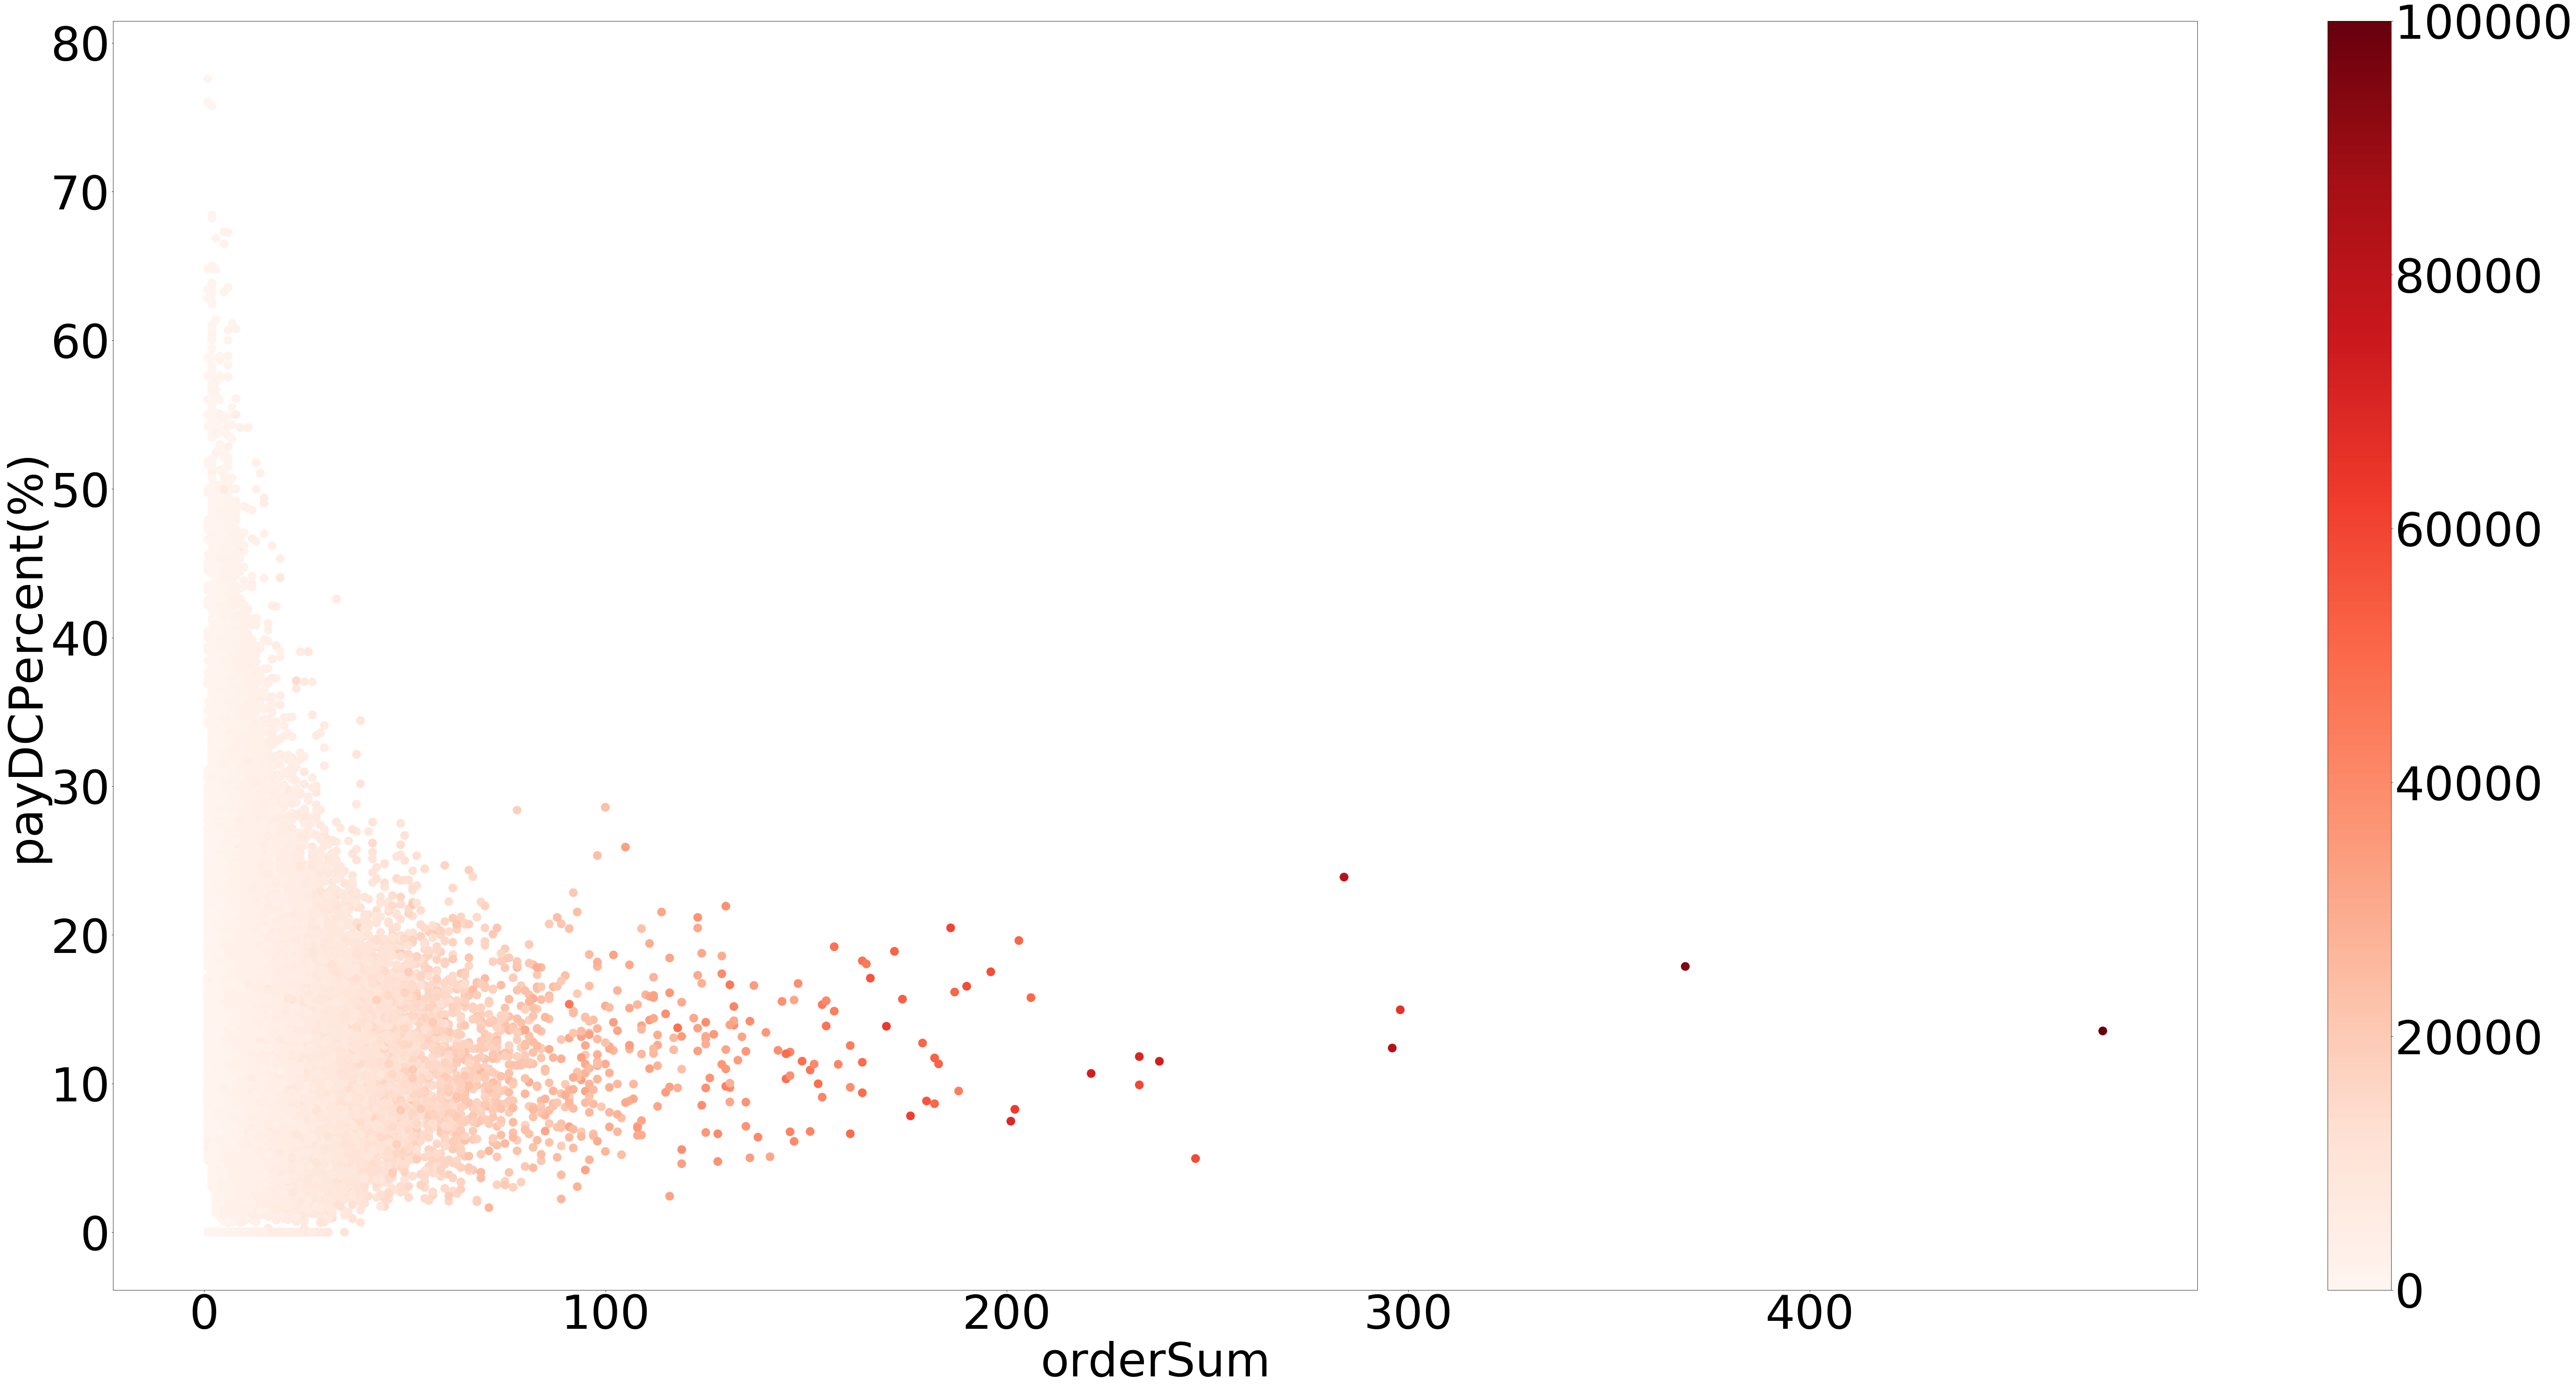

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams.update({'font.size': 100})
plt.figure(figsize=(100,50))
plt.xlabel("orderSum")
plt.ylabel("payDCPercent(%)")
cm = plt.cm.get_cmap('Reds')
area = np.pi * 100
sc = plt.scatter(
    df_NOOri_Fin_byMemId['orderSum'], 
    df_NOOri_Fin_byMemId['payDCPercent(%)'], 
    s=area, 
    c=df_NOOri_Fin_byMemId['oriPrice'],
    vmin=0,
    vmax=100000,
    cmap=cm, 
    alpha=1)
plt.colorbar(sc)
plt.show()

發現訂單量越高，深度越深，代表花越多錢！。嗯嗯廢話，當然阿！
應該改為平均訂單花費金額。

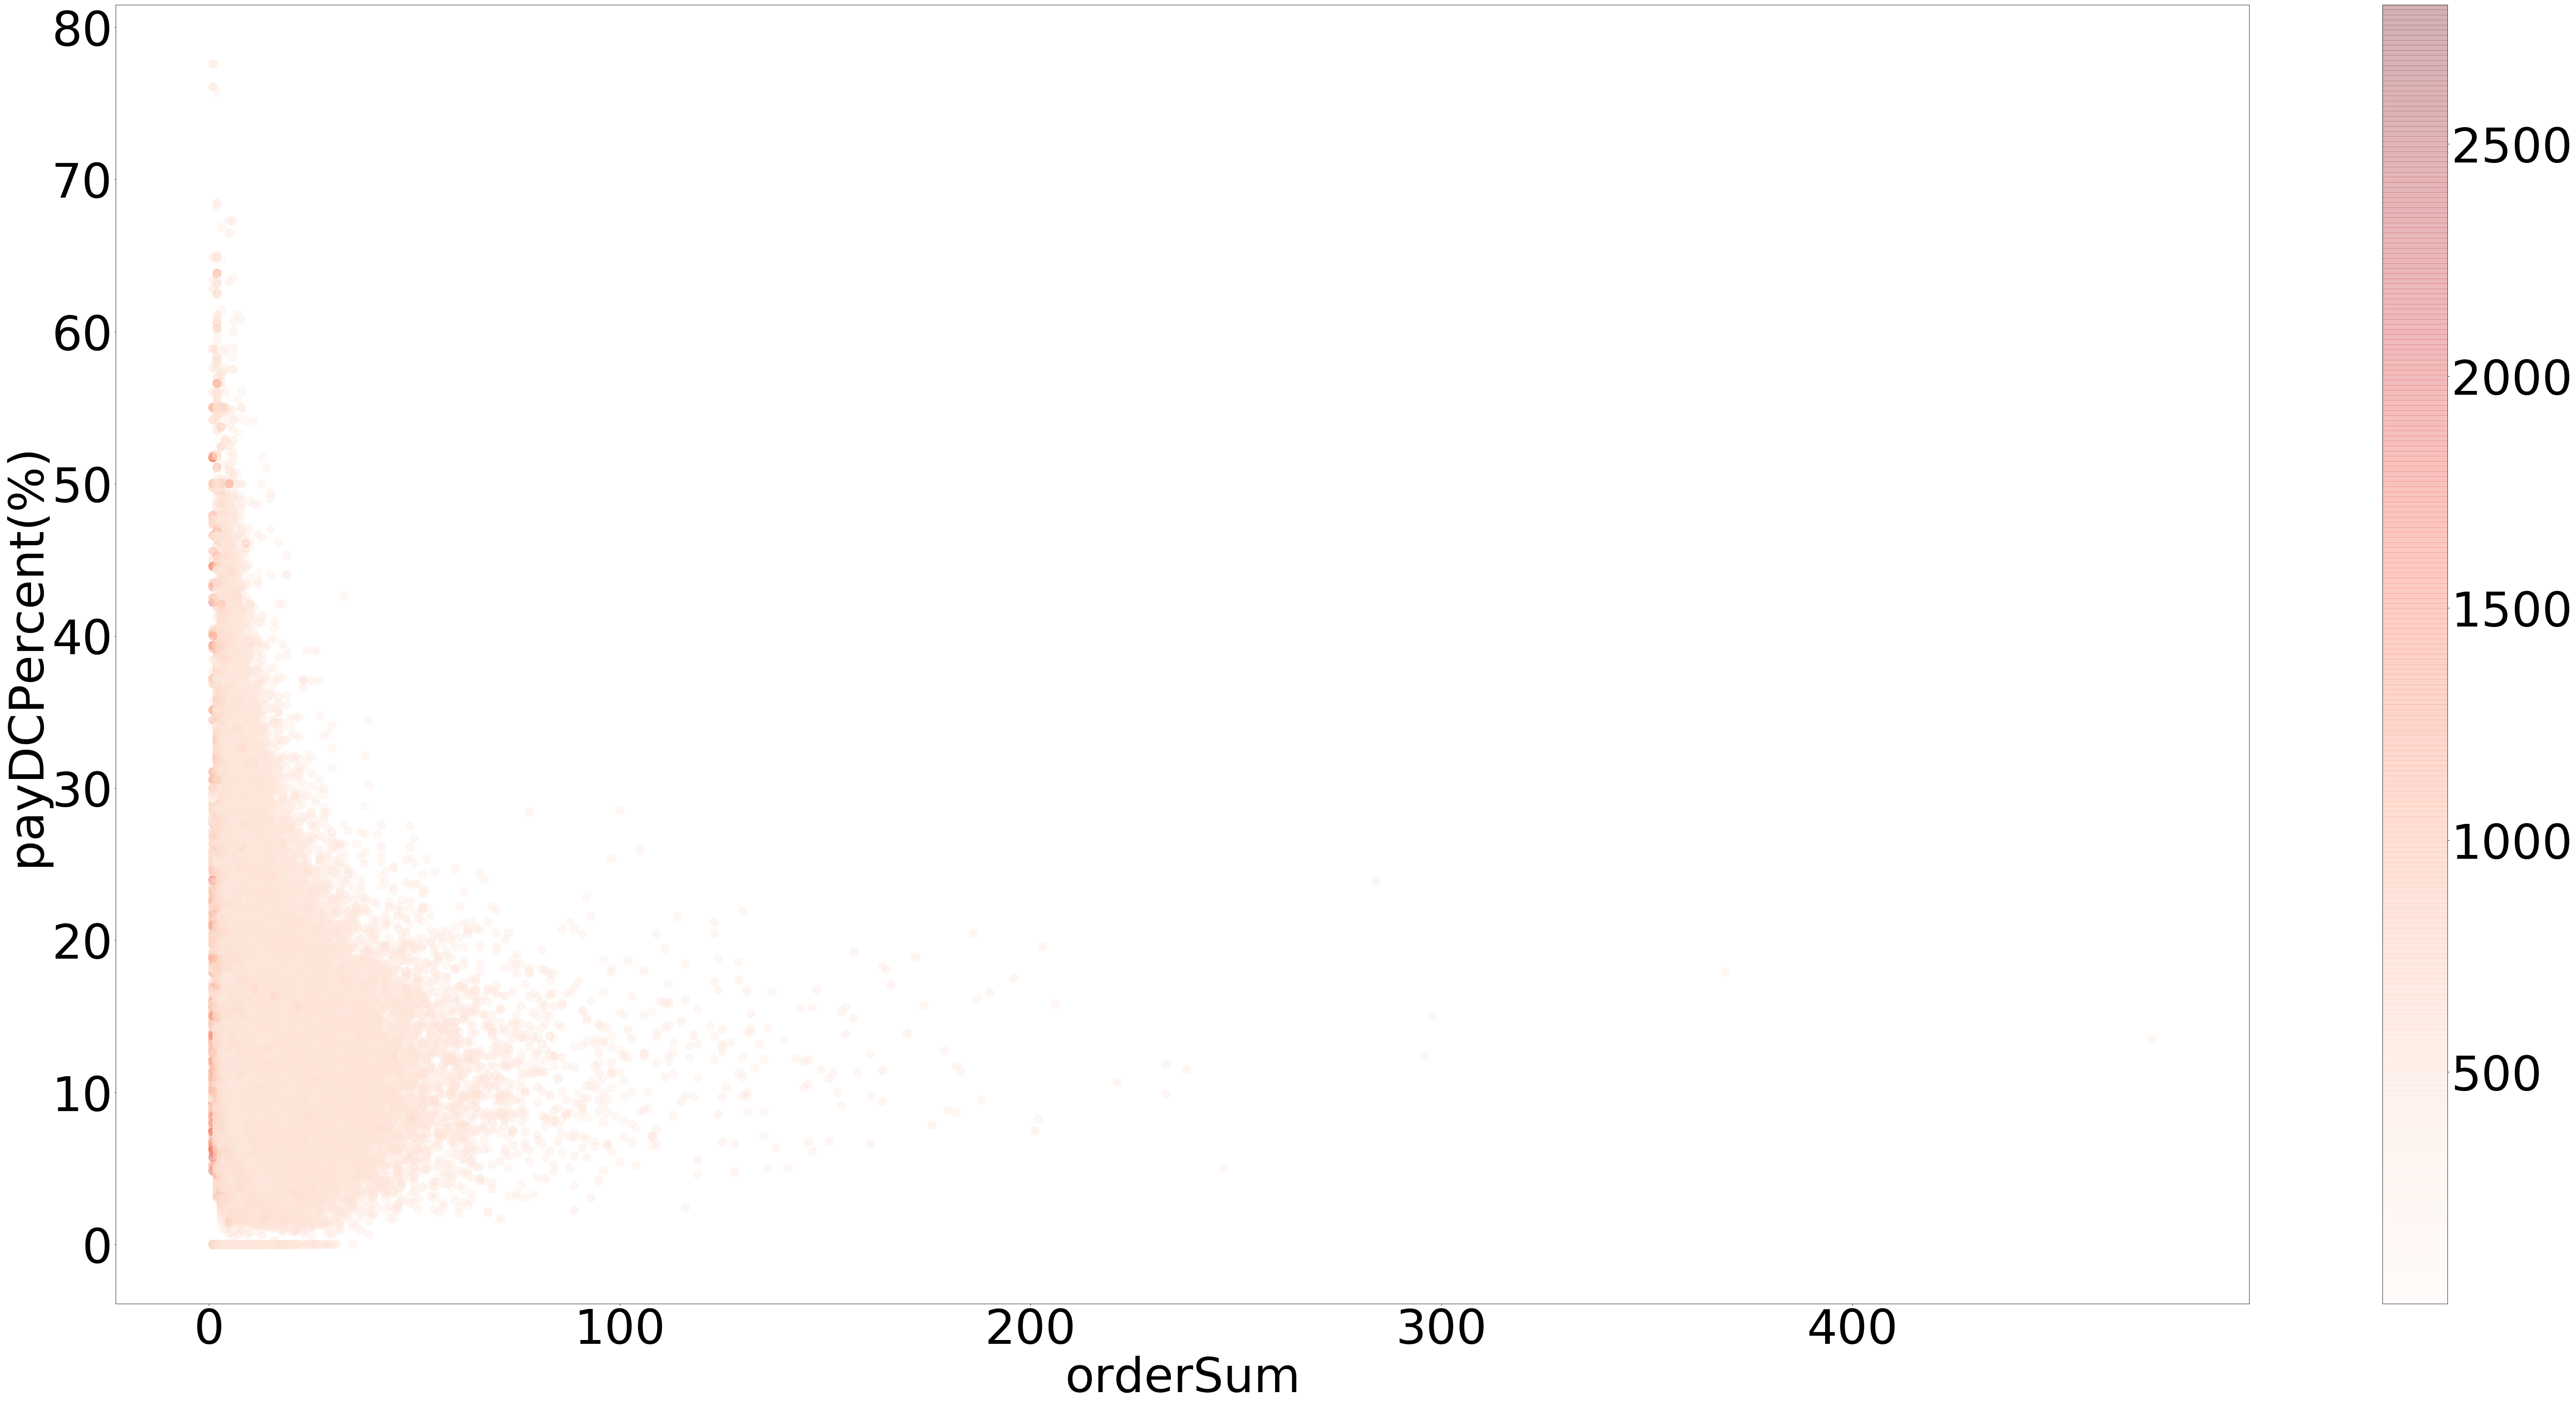

In [15]:
plt.figure(figsize=(100,50))
plt.xlabel("orderSum")
plt.ylabel("payDCPercent(%)")
cm = plt.cm.get_cmap('Reds')
area = np.pi * 100
sc = plt.scatter(
    df_NOOri_Fin_byMemId['orderSum'], 
    df_NOOri_Fin_byMemId['payDCPercent(%)'], 
    s=area, 
    c=df_NOOri_Fin_byMemId['oriPricePerOrder'],
    cmap=cm, 
    alpha=0.3)
plt.colorbar(sc)
plt.show()

發現少筆訂單之客戶較深，代表一次買比較多！

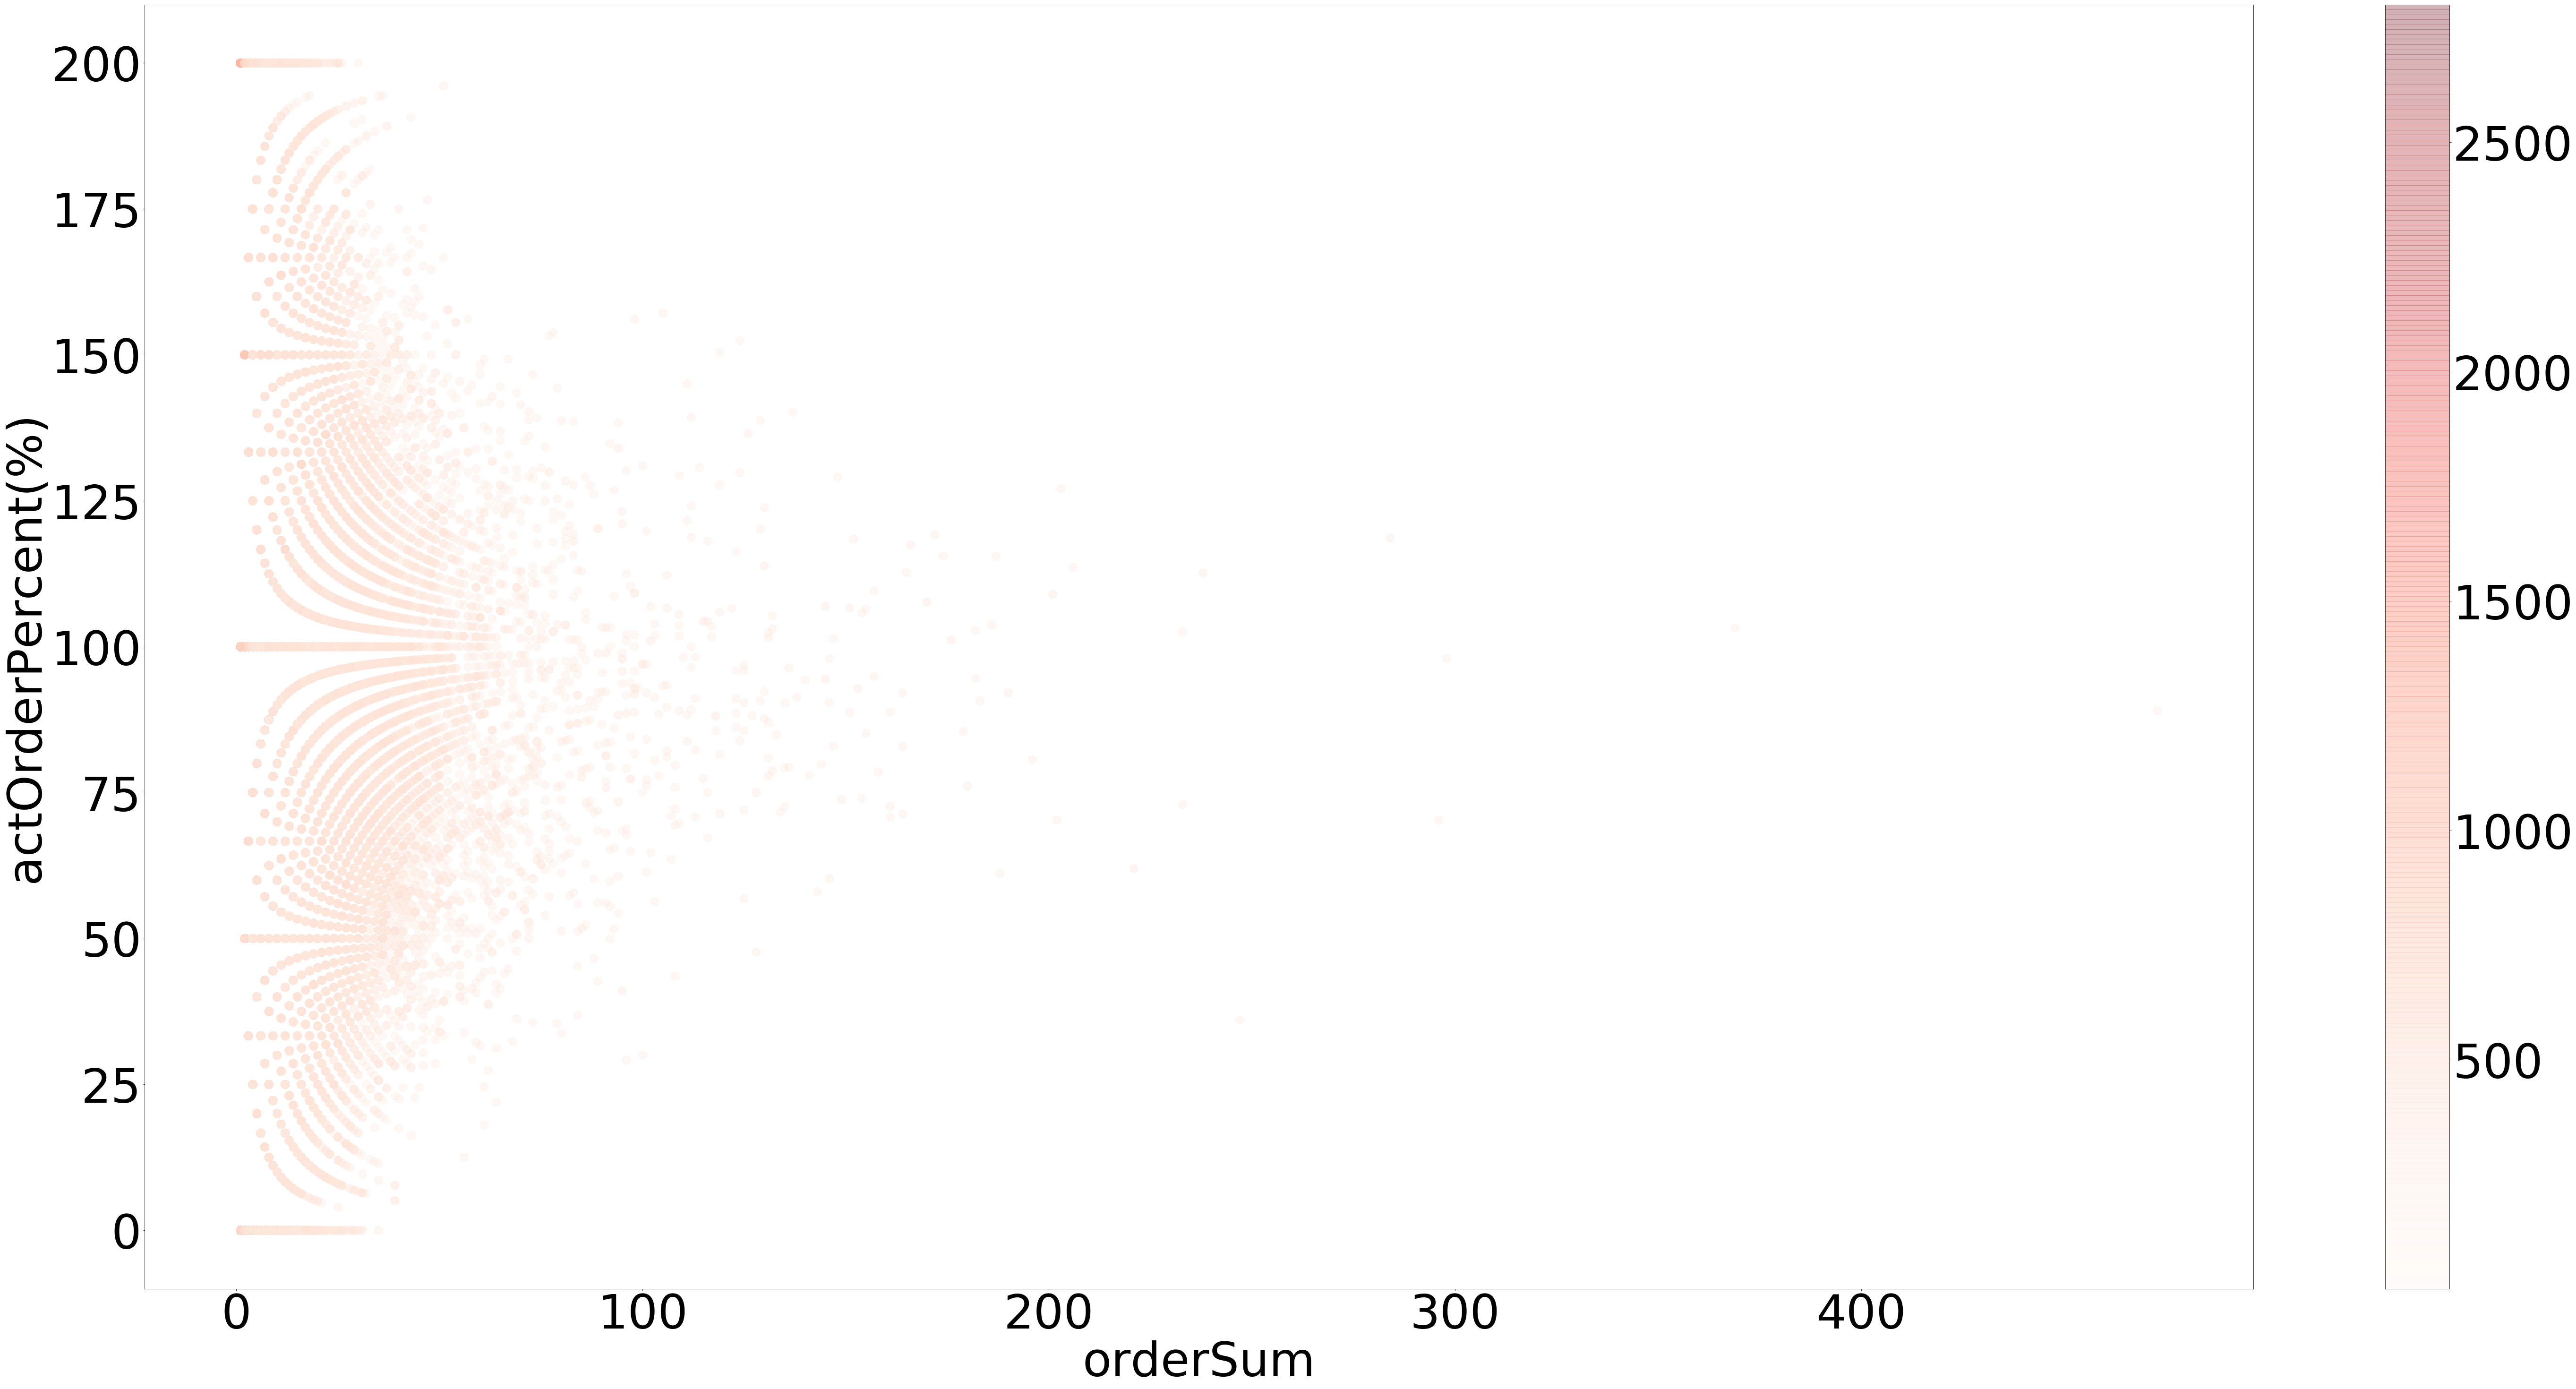

In [22]:
plt.figure(figsize=(100,50))
plt.xlabel("orderSum")
plt.ylabel("actOrderPercent(%)")
cm = plt.cm.get_cmap('Reds')
area = np.pi * 100
sc = plt.scatter(
    df_NOOri_Fin_byMemId['orderSum'], 
    df_NOOri_Fin_byMemId['actOrderPercent(%)'], 
    s=area, 
    c=df_NOOri_Fin_byMemId['oriPricePerOrder'],
    cmap=cm,
    alpha=0.3)
plt.colorbar(sc)
plt.show()

這時什麼圖？有趨近的感覺！
設置vmax

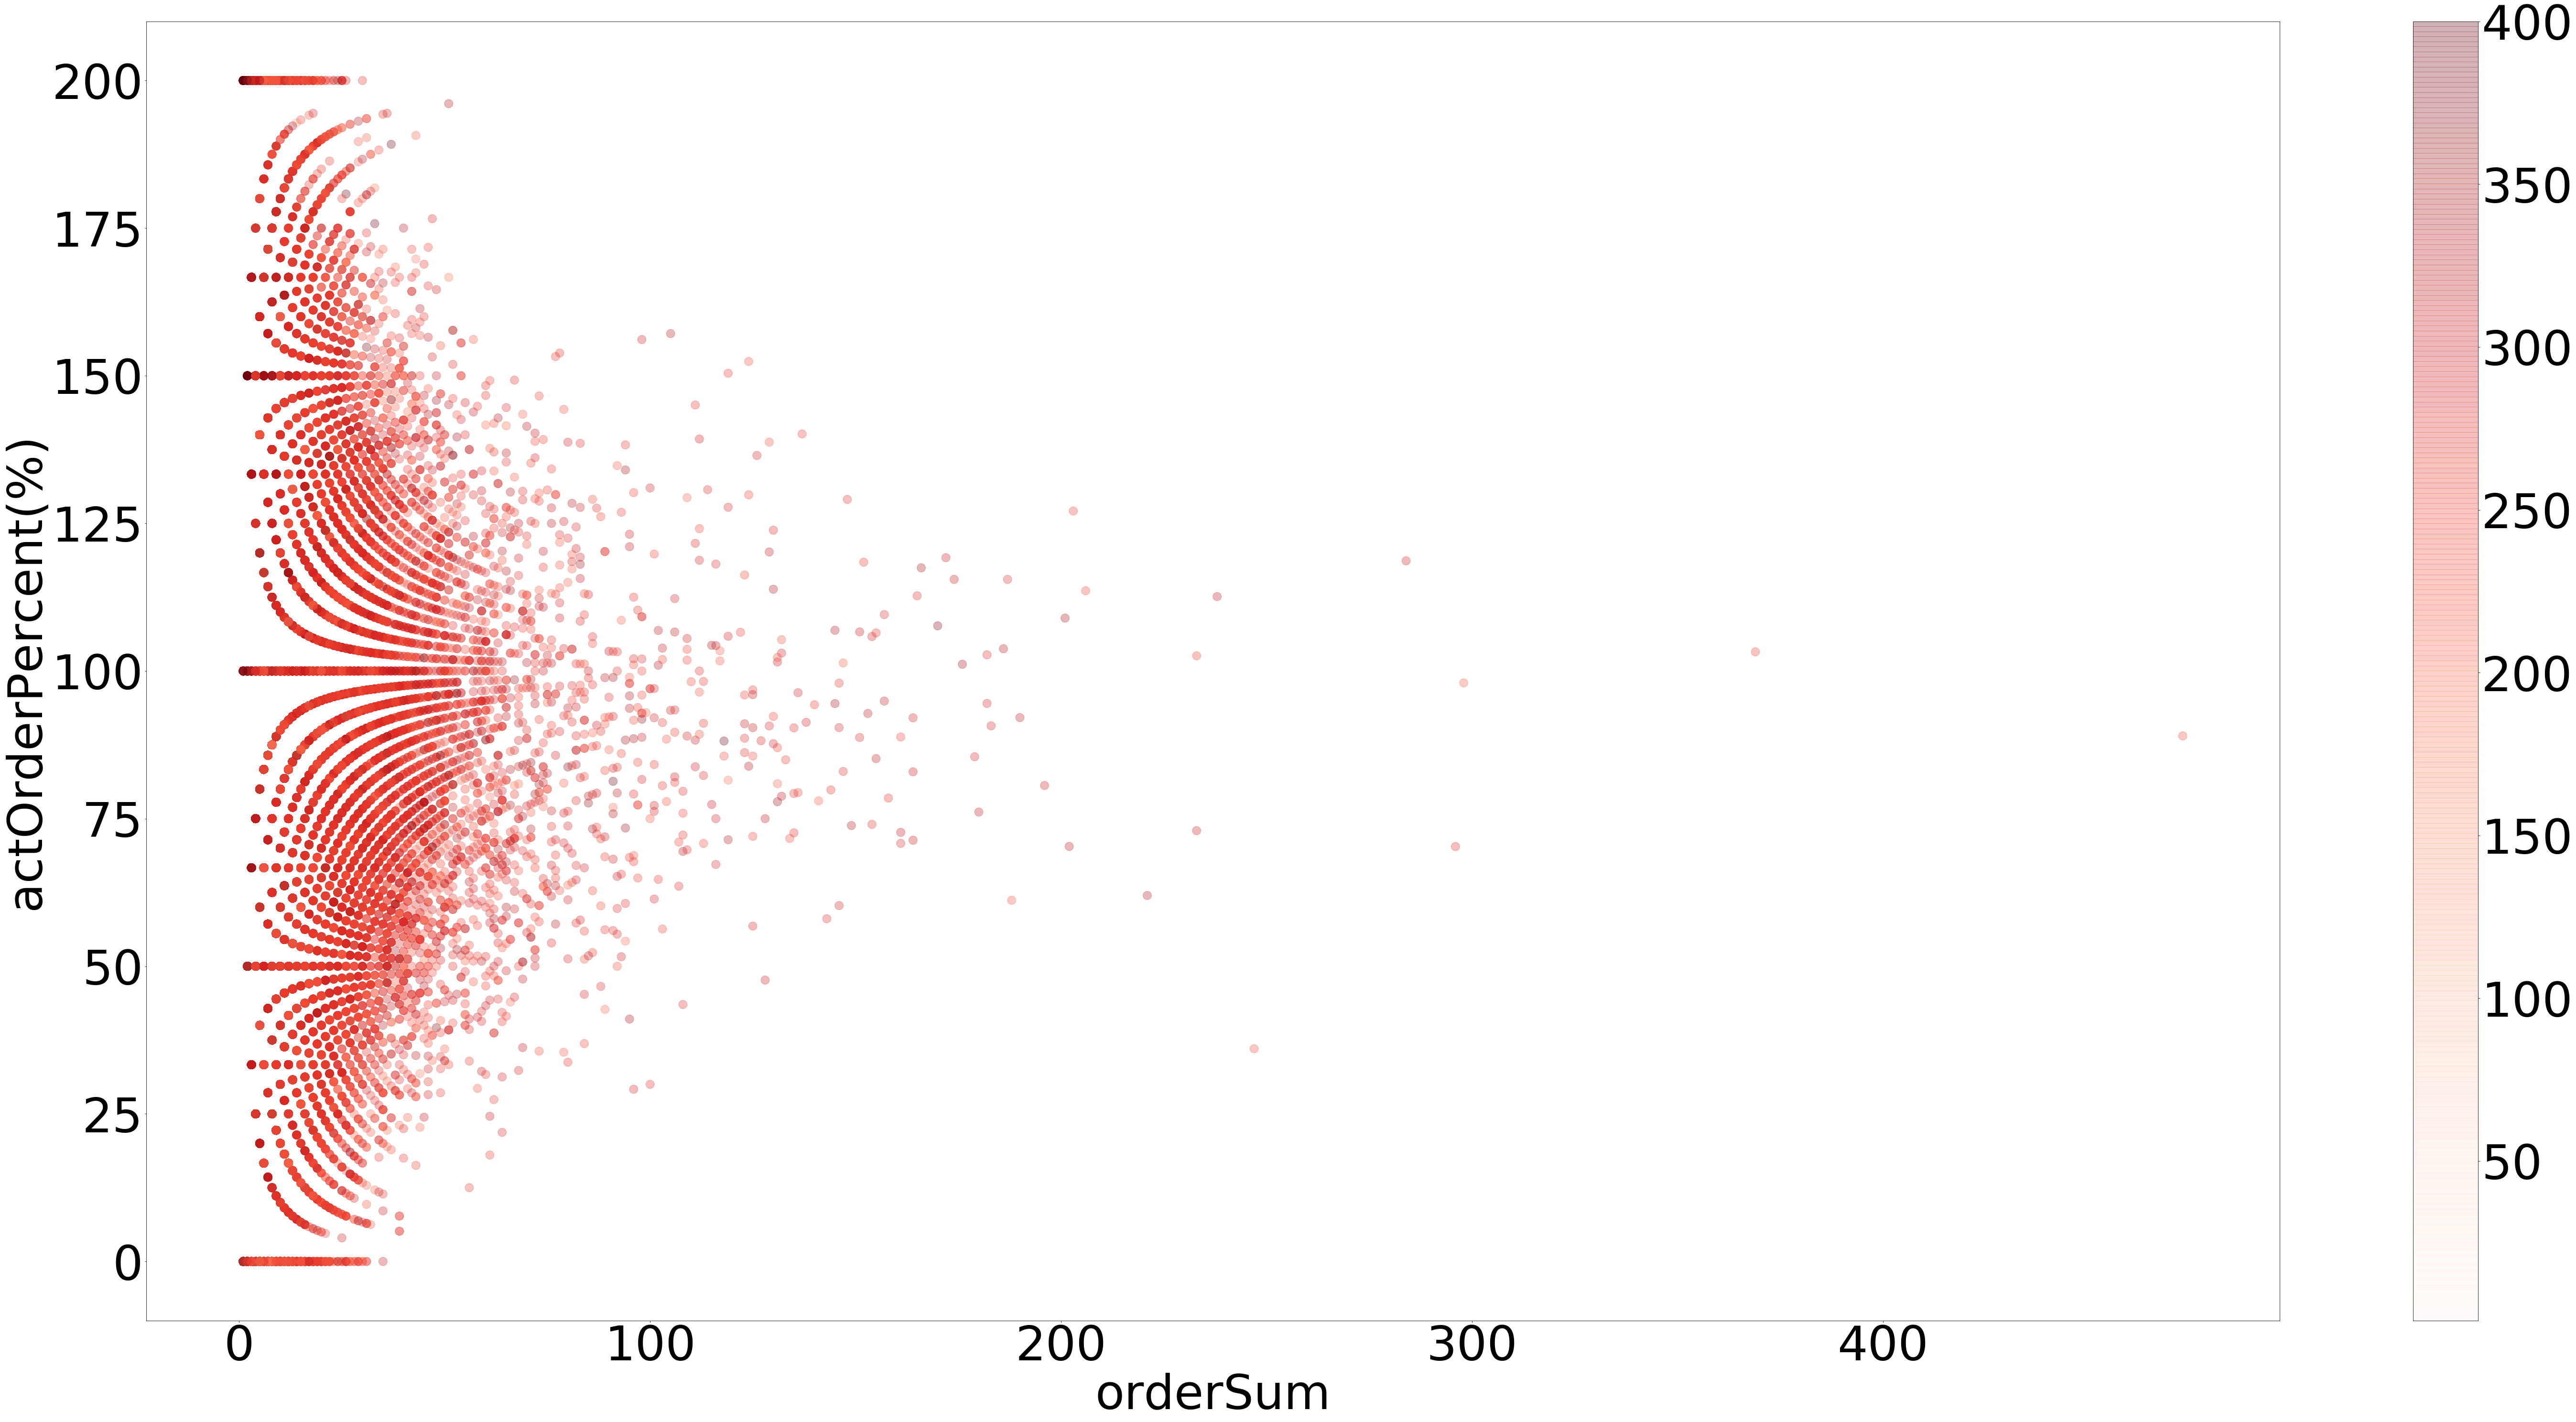

In [23]:
plt.figure(figsize=(100,50))
plt.xlabel("orderSum")
plt.ylabel("actOrderPercent(%)")
cm = plt.cm.get_cmap('Reds')
area = np.pi * 100
sc = plt.scatter(
    df_NOOri_Fin_byMemId['orderSum'], 
    df_NOOri_Fin_byMemId['actOrderPercent(%)'], 
    s=area, 
    c=df_NOOri_Fin_byMemId['oriPricePerOrder'],
    cmap=cm,
    vmax=400,
    alpha=0.3)
plt.colorbar(sc)
plt.show()